In [1]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


8


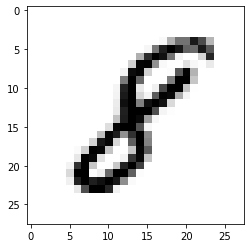

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline 
image_index = 7777 
print(y_train[image_index]) 
plt.imshow(x_train[image_index], cmap='Greys')

In [4]:
x_train.shape

(60000, 28, 28)

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [6]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])


from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) 
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Using TensorFlow backend.


In [7]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/10





60000/60000 [==============================] - 35s 577us/step - loss: 0.5788 - acc: 0.8287
Epoch 2/10
60000/60000 [==============================] - 34s 565us/step - loss: 0.2277 - acc: 0.9308
Epoch 3/10
60000/60000 [==============================] - 34s 561us/step - loss: 0.1682 - acc: 0.9495
Epoch 4/10
60000/60000 [==============================] - 34s 575us/step - loss: 0.1374 - acc: 0.9598
Epoch 5/10
60000/60000 [==============================] - 35s 575us/step - loss: 0.1197 - acc: 0.9641
Epoch 6/10
60000/60000 [==============================] - 34s 573us/step - loss: 0.1056 - acc: 0.9678
Epoch 7/10
60000/60000 [==============================] - 34s 574us/step - loss: 0.0962 - acc: 0.9702
Epoch 8/10
60000/60000 [==============================] - 34s 571us/step - loss: 0.0911 - acc: 0.9715
Epoch 9/10
60000/60000 [==============================] - 34s 568us/step - loss:

In [9]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 2s 165us/step


[0.06760087806191295, 0.9794]

9


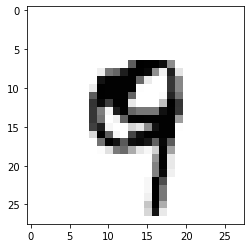

In [11]:
image_index = 4444
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())